# Objetivo do projeto
A partir de uma tabela única de reviews de usuários sobre vinhos, queremos extrair dados sobre os usuários, produtos, lojas, reviews e etc. (Disponível em https://www.kaggle.com/datasets/datafiniti/wine-beer-and-liquor-reviews)

Ou seja, temos uma tabela enorme e cheia de colunas, então iremos dividí-la em várias tabelas menores, mantendo a relação entre os dados originais.

Dessa forma, obteremos um modelo entidade-relacionamento completo, com cada entidade separada, podendo povoar um banco de dados de forma limpa e organizada, facilitando a consulta e a manutenção.

In [1]:
# @title
import pandas as pd
import numpy as np
import json

pd.set_option('display.max_columns', 32)

Leitura da tabela que será processada

In [2]:
uri = 'https://raw.githubusercontent.com/caalvaro/data-analysis/main/Data%20processing%20-%20Wine%20Reviews%20Dataset/wine%20reviews.csv'
df = pd.read_csv(uri, escapechar="'")
print('Tamanho da tabela:', df.shape)

df.head()

Tamanho da tabela: (2890, 32)


,id,asins,brand,categories,dateAdded,dateUpdated,descriptions,dimension,ean,flavors,keys,manufacturer,manufacturerNumber,name,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,sourceURLs,upc,weight
0,AV13ClKCGV-KLJ3akN68,NaN,Gallo,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:59:11Z,2018-01-10T18:06:28Z,NaN,1.0 in x 1.0 in x 1.0 in,NaN,NaN,"492130001994,gallo/13312834",NaN,13312834,Ecco Domani174 Pinot Grigio - 750ml Bottle,2017-08-01T21:13:49.000Z,2018-01-09T13:24:04Z,"2017-12-14T19:41:00.000Z,2017-12-19T19:55:00.0...",NaN,True,NaN,1.0,5.0,https://redsky.target.com/groot-domain-api/v1/...,This a fantastic white wine for any occasion!,My Favorite White Wine,NaN,NaN,Bjh,NaN,http://redsky.target.com/v1/plp/search?kwr=y&c...,4.9213E+11,1.0 lbs
1,AV13CsvW-jtxr-f38AQO,NaN,Fresh Craft Co.,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:59:42Z,2018-01-10T05:38:33Z,"[{""dateSeen"":[""2017-12-21T05:43:00.000Z"",""2017...",4.25 in x 4.25 in x 5.25 in,NaN,NaN,"freshcraft/50392800,083120003441",NaN,50392800,Fresh Craft174 Mango Citrus - 4pk / 250ml Bottle,2017-07-10T04:17:34.000Z,2018-01-09T17:31:52Z,"2017-12-17T05:32:00.000Z,2017-12-21T14:32:00.0...",NaN,True,NaN,NaN,5.0,https://redsky.target.com/groot-domain-api/v1/...,"Tart, not sweet...very refreshing and delicious!",Yum!!,NaN,NaN,Wino,NaN,http://redsky.target.com/v1/plp/search?kwr=y&c...,83120003441,2.45 lbs
2,AV13CVI_glJLPUi8O7Po,NaN,1000 Stories,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:58:05Z,2018-01-10T05:38:31Z,NaN,3.3 in x 3.3 in x 11.79 in,NaN,NaN,"082896001453,1000stories/50399893",NaN,50399893,1000 Stories174 Zinfandel - 750ml Bottle,2017-10-02T12:52:27.000Z,2018-01-09T17:31:51Z,"2017-12-17T05:30:00.000Z,2017-12-21T14:29:00.0...",NaN,True,NaN,NaN,5.0,https://redsky.target.com/groot-domain-api/v1/...,I was given this wine so it was a delightful s...,A New Favorite!,NaN,NaN,Bama Mom,NaN,http://redsky.target.com/v1/plp/search?kwr=y&c...,82896001453,3.09 lbs
3,AV13CVI_glJLPUi8O7Po,NaN,1000 Stories,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:58:05Z,2018-01-10T05:38:31Z,NaN,3.3 in x 3.3 in x 11.79 in,NaN,NaN,"082896001453,1000stories/50399893",NaN,50399893,1000 Stories174 Zinfandel - 750ml Bottle,2016-11-02T10:00:37.000Z,2017-10-04T18:03:12Z,"2017-09-30T00:52:32.856Z,2017-08-08T10:33:31.6...",NaN,True,NaN,NaN,5.0,https://redsky.target.com/groot-domain-api/v1/...,This is a phenomenal wine and my new favorite ...,"Bold, Flavorful, Aromatic, Delicious",NaN,NaN,Av Dub,NaN,http://redsky.target.com/v1/plp/search?kwr=y&c...,82896001453,3.09 lbs
4,AV13CYL4-jtxr-f37_-t,NaN,Wine Cube153,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:58:18Z,2018-01-10T18:06:29Z,"[{""dateSeen"":[""2017-12-21T05:43:00.000Z"",""2017...",1.0 in x 1.0 in x 1.0 in,NaN,NaN,"winecube153/14831433,085200600465",NaN,14831433,Pink Moscato - 3l Bottle - Wine Cube153,2014-11-25T03:37:34.000Z,2018-01-10T18:06:29Z,"2017-12-16T09:19:00.000Z,2017-12-20T16:57:00.0...",NaN,True,NaN,1.0,5.0,https://redsky.target.com/groot-domain-api/v1/...,4 750ml bottles for the price of two With way ...,"Yum! Plus, Environmentally Friendly!",Overland Park,NaN,Chelseamay,NaN,https://redsky.target.com/groot-domain-api/v1/...,85200600465,1.0 lbs


#Tabela de usuários

Começaremos extraindo dados sobre os usuários

In [3]:
# selecionamos as colunas de interesse
user = df[['reviews.username', 'reviews.userProvince', 'reviews.userCity']]

# renomeamos
user = user.rename(columns = {'reviews.username': 'username', 'reviews.userProvince': 'province', 'reviews.userCity': 'city'}, inplace=False).reset_index(drop=True)

# até aqui, pode haver duplicatas. Queremos manter os valores que possuem menos dados faltantes, portanto, usamos o sort para colocá-los no início, já que o drop_duplicates vai remover os últimos
user.sort_values(['province', 'city'])

user = user.drop_duplicates("username")

### Tabela final

In [4]:
print('Tamanho da tabela usuários:', user.shape)
user.head()

Tamanho da tabela usuários: (2469, 3)


,username,province,city
0,Bjh,NaN,NaN
1,Wino,NaN,NaN
2,Bama Mom,NaN,NaN
3,Av Dub,NaN,NaN
4,Chelseamay,NaN,Overland Park


In [5]:
user.city.unique()

array([nan, 'Overland Park', 'Athens', 'Jacksonville', 'Brea', 'Warren',
       'Houston', 'Washington', 'San Diego', 'Strum', 'Highland',
       'Hawthorne', 'Abbeville', 'Freeport', 'Alexandria', 'Tampa',
       'Vegas', 'Miami', 'Cleveland', 'Redwood City', 'St. Petersburg',
       'Cedar Park', 'San Jose', 'Carmichael', 'St. Louis', 'San Lorenzo',
       'Walnut Creek', 'Winchester', 'Van Nuys', 'Annapolis', 'Affton',
       'Milwaukee', 'Chicago', 'Boston', 'Youngsville', 'Riverhead',
       'Breezewood', 'Kona', 'New Orleans', 'Vancouver', 'Bakersfield',
       'Byron', 'Leesburg', 'Marquette', 'Birmingham', 'Glasgow',
       'Twin Valley', 'Virginia Beach', 'Collinsville', 'New City',
       'Walterboro', 'Nacogdoches', 'Owensboro', 'Palmetto', 'Atlanta',
       'York', 'Eagle Rock', 'Ozark', 'Oak Hill', 'Los Angeles',
       'Sherwood', 'Tuscaloosa', 'Columbia', 'Phoenix', 'Cedar Rapids',
       'Louisville'], dtype=object)

In [6]:
user.province.unique()

array([nan, 'MI', 'MD', 'CA', 'MN', 'WV', 'UT', 'FL', 'AZ'], dtype=object)

# Tabela de fabricantes

Para enriquecer os dados das fabricantes dos produtos, procuramos manualmente as URLs para o site delas.

In [7]:
# selecionamos as colunas de interesse e renomeamos
manufacturer = df[['manufacturer']]
manufacturer = manufacturer.rename(columns = {'manufacturer': 'name'}, inplace=False).drop_duplicates().dropna(subset=['name']).reset_index(drop=True)

# urls obtidas manualmente
urls = {
  'Cupcake Vineyards': 'https://www.cupcakevineyards.com/',
  'Coors Brewing Company':'https://www.coors.com/',
  'E.&J. Gallo Winery': 'https://www.gallo.com/',
  'Bogle Vineyards' : 'https://boglewinery.com/#',
  'Jim Beam' : 'https://www.jimbeam.com/en/',
  'W.J. Deutsch & Sons, Ltd.' : 'https://www.deutschfamily.com/',
  'Brown Forman Beverage':'https://www.brown-forman.com/',
  'Davinci Labs' : 'https://www.davincilabs.com/',
  'The Seagram Beverage Company' : 'https://www.seagramsescapes.com/',
  'Anheuser-Busch, Inc.' : 'https://www.anheuser-busch.com/',
  'Brewed by Blue Moon Brewing Company':'https://www.bluemoonbrewingcompany.com/',
  'MillerCoors' : 'https://www.molsoncoors.com/',
  'Diageo' : 'https://www.diageo.com/',
  'Heineken' :'https://www.heinekenbrasil.com.br/',
  'Miller Brewing Co.' : 'https://www.millerbrewerytour.com/',
  'Anheuser-Busch' : 'https://www.anheuser-busch.com/',
  'Heineken Brewery' : 'https://www.heinekenbrasil.com.br/',
  'Banfi' : 'https://www.banfi.it/en/',
  'Moet  and Chandon' : 'https://www.moet.com/en-gb',
  'Powell & Mahone': 'https://www.powellandmahoney.com/',
  'Fee Brothers' : 'https://www.feebrothers.com/',
  'Zing Zang' : 'https://zingzang.com/',
  'BELLA BOLLE' : 'https://bellabolle.wpengine.com/',
  'Dr Pepper Snapple Group, Inc.' : 'https://www.keurigdrpepper.com/',
  "Peychaud's" : 'https://www.sazerac.com/',
  'La Marca Prosecco' : 'https://www.lamarcaprosecco.com/',
  'GOYA FOODS, INC.' : 'https://www.goya.com/en/',
  'Dr Pepper/Seven Up, Inc' : 'https://www.7up.com/en',
  'American Euro Foods' : ' https://ameurofoods.com',
  'Melitta' : ' www.melitta.com',
  'Kraft Foods Beverages' :'https://www.kraftheinz-foodservice.com/',
  'Trademark Innovations' :'https://www.trademarkinnovations.com/',
  'Briess' : 'https://www.briess.com/',
  'PICKETT BROTHERS BEVERAGE LLC' :'https://www.pickettbrothersbeverage.com/',
  'Home Brew Stuff': 'https://home-brew-stuff.myshopify.com/',
  'Silver Springs': 'https://www.silverspringfoods.com/shop/',
  'Red Star' : 'https://www.redstarfoodservice.co.uk/',
  'Vita Food Products' : 'https://vitafoodproducts.com/',
  'Roland Foods' : ' https://rolandfoods.com/',
  'Goya' : 'https://www.goya.com/en/',
  'Alstertor': 'https://www.euroamericanbrands.com/alstertor',
  'Fermentis': 'https://fermentis.com/en/',
  'Mr. & Mrs. T' : 'https://www.mrandmrst.com/',
  'Home Brew Ohio': 'https://www.homebrewohio.com/',
  'Lipton Brisk': 'https://www.drinkbrisk.com/',
  'COCO REAL' : 'https://enjoyrealcoco.com/',
  'Heinz Frozen': 'https://www.kraftheinz-foodservice.com/',
  'POWELL & MAHONEY LTD': 'https://www.powellandmahoney.com/' ,
  'Fiber Choice' : 'https://www.fiberchoice.com/' ,
  'Kalamera' : 'https://www.kalamera.com/' ,
  'MANISCHEWITZ' : 'https://manischewitz.com/ ',
  'Regatta' : 'https://regattacraftmixers.com/',
  "Mott's LLP" : 'www.motts.com/',
  'American Beverage Corp.': 'https://www.csbeverage.com/portfolio_page/american-beverage-corporation/',
  'Duplin Wine Cellars' :' https://www.duplinwinery.com/',
  'GMAX' : ' https://gmaxketo.com/',
  'Margaritaville' : 'https://www.margaritaville.com/',
  'Angostura' : 'http://www.angostura.com/',
  'Powell & Mahoney' : 'https://www.powellandmahoney.com/ ',
  'Jose Cuervo' : 'https://cuervo.com/',
  'American Beverage Marketers' : 'https://abmcocktails.com/' ,
  'KegWorks' : 'https://www.kegworks.com/' ,
  'Master of Mixes': 'https://www.masterofmixes.com/',
  'Wal-Mart Stores, Inc.': 'https://www.walmart.com/',
  'Brands of Britain, LLC': 'https://www.brandsofbritain.com/' ,
  'Flower Foods': 'https://www.flowersfoods.com/',
}

# adicionamos uma nova coluna para as URLs
manufacturer['url'] = manufacturer['name'].map(urls)

### Tabela final

In [8]:
print('Tamanho da tabela manufacturer:', manufacturer.shape)
manufacturer.head()

Tamanho da tabela manufacturer: (75, 2)


,name,url
0,Cupcake Vineyards,https://www.cupcakevineyards.com/
1,Coors Brewing Company,https://www.coors.com/
2,E.&J. Gallo Winery,https://www.gallo.com/
3,Bogle Vineyards,https://boglewinery.com/#
4,Jim Beam,https://www.jimbeam.com/en/


In [9]:
manufacturer.name.unique()

array(['Cupcake Vineyards', 'Coors Brewing Company', 'E.&J. Gallo Winery',
       'Bogle Vineyards', 'Jim Beam', 'W.J. Deutsch & Sons, Ltd.',
       'Brown Forman Beverage', 'Davinci Labs',
       'The Seagram Beverage Company', 'Anheuser-Busch, Inc.',
       'Brewed by Blue Moon Brewing Company', 'MillerCoors', 'Diageo',
       'Heineken', 'Miller Brewing Co.', 'Anheuser-Busch',
       'Heineken Brewery', 'Wild Blue', 'Banfi', 'Moet  and Chandon',
       'Skinny Cocktail', 'Zatarains', 'Powell & Mahone', 'Fee Brothers',
       'Zing Zang', 'BELLA BOLLE', 'Dr Pepper Snapple Group, Inc.',
       'Coco Real', 'Peychauds', 'La Marca Prosecco', 'GOYA FOODS, INC.',
       'Dr Pepper/Seven Up, Inc', 'Placeholder',
       'American Beverage Marketers', 'KegWorks', 'Master of Mixes',
       'Wal-Mart Stores, Inc.', 'Dirty Sue', 'Brands of Britain, LLC',
       'Flower Foods', 'Generic', 'Jose Cuervo', 'Powell & Mahoney',
       'Angostura', 'Margaritaville', 'GMAX', 'Duplin Wine Cellars',
    

# Tabela de lojas

Desejamos criar uma tabela com todas as lojas disponíveis no dataset. Para isso, extraímos todos os diferentes sites registrados lá. A partir deles, iremos criar uma lista de lojas.

In [10]:
# manualmente criamos um dicionário para fornecer o nome da loja baseado no site dela
store_name_by_url = {'www.ebay.com': 'ebay',
 'www.amazon.com': 'amazon',
 'www.goodguide.com': 'goodguide',
 'www.qvc.com': 'qvc',
 'www.shoprite.com': 'shoprite',
 'redsky.target.com': 'target',
 'www.ebay.com.au': 'ebay au',
 'www.upccodesearch.com': 'upccodesearch',
 'www.amazon.co.uk': 'amazon uk',
 'www.newegg.com': 'newegg',
 'www.kmart.com': 'kmart',
 'grocerystork.grocerydirect.com': 'fresh direct',
 'thrivemarket.com': 'thrivemarket',
 'autoplicity.com': 'autoplicity',
 'www.product-open-data.com': 'product-open-data',
 'wrd.walmart.com': 'walmart wrd',
 'qvc.ugc.bazaarvoice.com': 'bazaarvoice',
 'www.luckyvitamin.com': 'luckyvitamin',
 'www.barcodable.com': 'barcodable',
 'www.walmart.com': 'walmart'}

# criamos um dataframe contendo as informações da loja
store = pd.DataFrame(data=pd.Series(data=store_name_by_url)).reset_index()

store.columns = ['url', 'name']
store

,url,name
0,www.ebay.com,ebay
1,www.amazon.com,amazon
2,www.goodguide.com,goodguide
3,www.qvc.com,qvc
4,www.shoprite.com,shoprite
5,redsky.target.com,target
6,www.ebay.com.au,ebay au
7,www.upccodesearch.com,upccodesearch
8,www.amazon.co.uk,amazon uk
9,www.newegg.com,newegg


# Tabela de produtos

Para a tabela de produtos, iremos começar a adicionar as *foreign keys* para relacionar as entidades **produto** e **manufacturer**

In [11]:
# selecionamos as colunas de interesse e renomeamos
product = df[['name', 'asins', 'brand', 'sourceURLs','descriptions', 'categories', 'dimension', 'weight', 'manufacturer']]
product = product.rename(columns = {'asins': 'asin', 'descriptions': 'json_description'}, inplace=False)

product = product.drop_duplicates('name').dropna(subset=['name']).reset_index(drop=True)

print('Tamanho da tabela product:', product.shape)
product.head()

Tamanho da tabela product: (332, 9)


,name,asin,brand,sourceURLs,json_description,categories,dimension,weight,manufacturer
0,Ecco Domani174 Pinot Grigio - 750ml Bottle,NaN,Gallo,http://redsky.target.com/v1/plp/search?kwr=y&c...,NaN,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",1.0 in x 1.0 in x 1.0 in,1.0 lbs,NaN
1,Fresh Craft174 Mango Citrus - 4pk / 250ml Bottle,NaN,Fresh Craft Co.,http://redsky.target.com/v1/plp/search?kwr=y&c...,"[{""dateSeen"":[""2017-12-21T05:43:00.000Z"",""2017...","Food & Beverage,Beverages,Wine, Beer & Liquor,...",4.25 in x 4.25 in x 5.25 in,2.45 lbs,NaN
2,1000 Stories174 Zinfandel - 750ml Bottle,NaN,1000 Stories,http://redsky.target.com/v1/plp/search?kwr=y&c...,NaN,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",3.3 in x 3.3 in x 11.79 in,3.09 lbs,NaN
3,Pink Moscato - 3l Bottle - Wine Cube153,NaN,Wine Cube153,https://redsky.target.com/groot-domain-api/v1/...,"[{""dateSeen"":[""2017-12-21T05:43:00.000Z"",""2017...","Food & Beverage,Beverages,Wine, Beer & Liquor,...",1.0 in x 1.0 in x 1.0 in,1.0 lbs,NaN
4,Becks174 Non Alcoholic Beer - 6pk / 12oz Bottles,NaN,Becks Na,http://redsky.target.com/v1/plp/search?kwr=y&c...,NaN,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",1.0 in x 1.0 in x 1.0 in,1.0 lbs,NaN


In [12]:
# criamos um dicionário com os ids dos fabricantes pelo nome
manufacturer_id_by_name = dict(zip(manufacturer['name'], manufacturer.index))

# adicionamos uma coluna para relacionar product e manufacturer
product['fk_Manufacturer_Id'] = product['manufacturer'].map(manufacturer_id_by_name).convert_dtypes()

In [13]:
# visualizando apenas as linhas que não possuem valores nulos
product.dropna().head()

,name,asin,brand,sourceURLs,json_description,categories,dimension,weight,manufacturer,fk_Manufacturer_Id
120,Wild174 Blue Premium Blueberry Lager - 6pk / 1...,B01MT0QG65,Wild,https://redsky.target.com/groot-domain-api/v1/...,"[{""dateSeen"":[""2017-11-11T08:16:00.000Z""],""sou...","Food & Beverage,Beverages,Wine, Beer & Liquor,...",1.0 in x 1.0 in x 1.0 in,1.0 lbs,Wild Blue,17
126,Riunite174 Lambrusco - 1.5l Bottle Bottle,B007C69ZZ6,Riunite,http://redsky.target.com/v1/plp/search?kwr=y&c...,"[{""dateSeen"":[""2017-12-18T23:24:00.000Z"",""2017...","Food & Beverage,Beverages,Wine, Beer & Liquor,...",1.0 in x 1.0 in x 1.0 in,1.0 lbs,Banfi,18
135,Moet Chandon174 Imperial Champagne - 750ml Bottle,B00699OSUE,Moet Chandon,http://redsky.target.com/v1/plp/search?kwr=y&c...,"[{""dateSeen"":[""2017-12-21T05:43:00.000Z"",""2017...","Food & Beverage,Beverages,Wine, Beer & Liquor,...",1.0 in x 1.0 in x 1.0 in,1.0 lbs,Moet and Chandon,19
137,Zatarains174 Root Beer Extract Bottle - 4 Floz,B00122E62S,Zatarains,http://redsky.target.com/v1/plp/search?kwr=y&c...,"[{""dateSeen"":[""2018-01-09T19:43:00.000Z"",""2017...","Food & Beverage,Baking & Cooking Essentials,Ba...",1.938 in x 1.938 in x 4.258 in,0.267 lbs,Zatarains,21
140,Powell Mahoney174 Lemon Sour Mix - 750ml Bottle,B005VUGQ3O,Powell Mahoney,http://redsky.target.com/v1/plp/search?kwr=y&c...,"[{""dateSeen"":[""2017-12-16T14:01:00.000Z"",""2017...","Food & Beverage,Beverages,Cocktail Mixes,Food,...",3.0 in x 3.0 in x 11.3 in,1.0 lbs,Powell & Mahone,22


Para a descrição do produto, não temos um texto bem formatado e sim um JSON. Portanto, vamos extrair um texto válido desse JSON para ser a descrição do produto.

In [14]:
def get_description(row):
  try:
      description = json.loads(row)
      return description[0].get('value').replace(';', '').replace('"', '')
  except:
      return np.NaN


product['description'] = product[['json_description']].applymap(get_description)
print('Tamanho da tabela product', product.shape)

# visualizando apenas as linhas que não possuem NaNs
product.dropna().head()

Tamanho da tabela product (332, 11)


,name,asin,brand,sourceURLs,json_description,categories,dimension,weight,manufacturer,fk_Manufacturer_Id,description
120,Wild174 Blue Premium Blueberry Lager - 6pk / 1...,B01MT0QG65,Wild,https://redsky.target.com/groot-domain-api/v1/...,"[{""dateSeen"":[""2017-11-11T08:16:00.000Z""],""sou...","Food & Beverage,Beverages,Wine, Beer & Liquor,...",1.0 in x 1.0 in x 1.0 in,1.0 lbs,Wild Blue,17,Wild Blue Premium Blueberry Lager Beer is brew...
126,Riunite174 Lambrusco - 1.5l Bottle Bottle,B007C69ZZ6,Riunite,http://redsky.target.com/v1/plp/search?kwr=y&c...,"[{""dateSeen"":[""2017-12-18T23:24:00.000Z"",""2017...","Food & Beverage,Beverages,Wine, Beer & Liquor,...",1.0 in x 1.0 in x 1.0 in,1.0 lbs,Banfi,18,Indicasione geografica tipica. Lambrusco grape...
135,Moet Chandon174 Imperial Champagne - 750ml Bottle,B00699OSUE,Moet Chandon,http://redsky.target.com/v1/plp/search?kwr=y&c...,"[{""dateSeen"":[""2017-12-21T05:43:00.000Z"",""2017...","Food & Beverage,Beverages,Wine, Beer & Liquor,...",1.0 in x 1.0 in x 1.0 in,1.0 lbs,Moet and Chandon,19,With A Blend Based On A Predominance Of Pinot ...
137,Zatarains174 Root Beer Extract Bottle - 4 Floz,B00122E62S,Zatarains,http://redsky.target.com/v1/plp/search?kwr=y&c...,"[{""dateSeen"":[""2018-01-09T19:43:00.000Z"",""2017...","Food & Beverage,Baking & Cooking Essentials,Ba...",1.938 in x 1.938 in x 4.258 in,0.267 lbs,Zatarains,21,The Contents Of This Bottle Will Make 6 Gallon...
140,Powell Mahoney174 Lemon Sour Mix - 750ml Bottle,B005VUGQ3O,Powell Mahoney,http://redsky.target.com/v1/plp/search?kwr=y&c...,"[{""dateSeen"":[""2017-12-16T14:01:00.000Z"",""2017...","Food & Beverage,Beverages,Cocktail Mixes,Food,...",3.0 in x 3.0 in x 11.3 in,1.0 lbs,Powell & Mahone,22,"Directionsbrshake Well, Fruit Pulp May Settle...."


Antes de concluir a tabela de produtos, precisamos fazer mais uma extração de informação.

Até então, para cada produto, temos uma lista de urls que direcionam para o site de compra. Vamos usar essa lista para indicar qual loja vende qual produto e qual produto é vendido em qual loja. É um relacionamento n:n, então precisaremos criar uma tabela pivot para representá-lo.

Vamos começar essa tabela a partir dos indíces de produtos e as URLS na próxima seção.

# Tabela product_store

In [15]:
product_store = pd.DataFrame(columns = ['fk_product_id', 'fk_store_id', 'sourceURLs'])
product_store['fk_product_id'] = product.index
product_store['sourceURLs'] = product['sourceURLs']

product_store.head()

,fk_product_id,fk_store_id,sourceURLs
0,0,NaN,http://redsky.target.com/v1/plp/search?kwr=y&c...
1,1,NaN,http://redsky.target.com/v1/plp/search?kwr=y&c...
2,2,NaN,http://redsky.target.com/v1/plp/search?kwr=y&c...
3,3,NaN,https://redsky.target.com/groot-domain-api/v1/...
4,4,NaN,http://redsky.target.com/v1/plp/search?kwr=y&c...


Vamos transformar essa string em uma lista de URLs e usar a função explode do pandas para separar cada URL numa linha

In [16]:
product_store['urls_list'] = product_store['sourceURLs'].map(lambda urls: set(urls.split(',')))
product_store = product_store.explode('urls_list', ignore_index=True)
product_store.head()

,fk_product_id,fk_store_id,sourceURLs,urls_list
0,0,NaN,http://redsky.target.com/v1/plp/search?kwr=y&c...,https://redsky.target.com/groot-domain-api/v1/...
1,0,NaN,http://redsky.target.com/v1/plp/search?kwr=y&c...,http://redsky.target.com/v1/plp/search?kwr=y&c...
2,0,NaN,http://redsky.target.com/v1/plp/search?kwr=y&c...,http://redsky.target.com/v1/plp/search?kwr=y&c...
3,0,NaN,http://redsky.target.com/v1/plp/search?kwr=y&c...,http://redsky.target.com/v1/plp/search?kwr=y&c...
4,0,NaN,http://redsky.target.com/v1/plp/search?kwr=y&c...,http://redsky.target.com/v1/plp/search?kwr=y&c...


In [17]:
# criamos um dicionário com os ids das lojas pela url
store_id_by_url = dict(zip(store['url'], manufacturer.index))

product_store['fk_store_id'] = product_store['urls_list'].map(lambda url: store_id_by_url.get(url.split('/')[2]))

### Tabela final para product_store

In [18]:
product_store = product_store.drop(columns=['sourceURLs']).rename(columns = {'urls_list': 'url'})
product_store.head()

,fk_product_id,fk_store_id,url
0,0,5,https://redsky.target.com/groot-domain-api/v1/...
1,0,5,http://redsky.target.com/v1/plp/search?kwr=y&c...
2,0,5,http://redsky.target.com/v1/plp/search?kwr=y&c...
3,0,5,http://redsky.target.com/v1/plp/search?kwr=y&c...
4,0,5,http://redsky.target.com/v1/plp/search?kwr=y&c...


Finalizamos a tabela pivot entre Store e Product, mas antes de finalizar a tabela product, precisamos tratar as categorias.

# Tabela de categorias

Extraindo todas as categorias existentes na tabela, podemos ver que existem algumas que não fazem muito sentido, então iremos eliminá-las.

In [19]:
categories = set(product['categories'].map(lambda categories: categories.split(',')).explode('categories').map(lambda categorie: categorie.strip()).to_list())
categories

{'#10',
 '#1002 in',
 '#179          in',
 '#179 in',
 '#2',
 '#23900 in',
 '#251 in',
 '#25151 in',
 '#29 in',
 '#306 in',
 '#309 in',
 '#321 in',
 '#3363 in',
 '#365 in',
 '#39 in',
 '#447 in',
 '#6',
 '#610 in',
 '#6499 in',
 '#817 in',
 '#851          in',
 '#851 in',
 '#8805 in',
 '#9195 in',
 '& Salad Dressings',
 '436 in',
 '499          in',
 '499 in',
 '822 in',
 'Alcohol & Alcohol Mixers',
 'All Coolers',
 'Artisan Breads',
 'Asian',
 'Back To College',
 'Bacon & Sausages',
 'Bakery & Bread',
 'Baking',
 'Baking & Cooking Essentials',
 'Baking Essentials',
 'Bar & Beverage Equipment',
 'Bar Supplies',
 'Beauty',
 'Beer',
 'Beer & Liquor',
 'Beer Mustard',
 'Beer and Beverage Fridges',
 'Beverages',
 'Bitters',
 'Bloody Mary',
 'Bottled Beverages',
 'Bread and Flour Products',
 'Business & Industrial',
 'Camping',
 'Canned Goods',
 'Canned Goods & Soups',
 'Canned Ready to Eat Meals',
 'Categories',
 'Champagne & Sparkling Wines',
 'Chips & Crisps',
 'Chips & Snacks',
 'Cockta

In [20]:
inconsistent_categories = ('#10', '#1002 in', '#179          in', '#179 in', '#2', '#23900 in', '#251 in', '#25151 in', '#29 in', '#306 in', '#309 in', '#321 in', '#3363 in',
                          '#365 in', '#39 in', '#447 in', '#6', '#610 in', '#6499 in', '#817 in', '#851          in', '#851 in', '#8805 in', '#9195 in', '& Salad Dressings')

categories = set(filter(lambda categorie: categorie not in inconsistent_categories, categories))
categorie = pd.DataFrame(categories, columns=['name'])

categorie.head()

,name
0,Health Care
1,Condiments
2,Beer
3,Detox & Digestive Aids
4,Mustard


In [23]:
categories_id_by_name = dict(zip(categorie['name'], categorie.index))

product_categorie = product[['categories']] \
  .applymap(lambda categories: categories.split(',')) \
  .explode('categories') \
  .applymap(lambda categorie: categories_id_by_name.get(categorie, pd.NA)) \
  .reset_index() \
  .dropna()


product_categorie.columns = ['product_fk', 'categorie_fk']
print(product_categorie.shape)
product_categorie

(1839, 2)


,product_fk,categorie_fk
0,0,108
1,0,46
2,0,76
4,0,76
5,1,108
...,...,...
2275,330,62
2276,330,162
2277,331,39
2278,331,62


### Tabela final para produto

Agora finalmente terminando a tabela de produtos

In [24]:
product = product.drop(columns=['sourceURLs', 'json_description', 'categories', 'manufacturer'])
product.head()

,name,asin,brand,dimension,weight,fk_Manufacturer_Id,description
0,Ecco Domani174 Pinot Grigio - 750ml Bottle,NaN,Gallo,1.0 in x 1.0 in x 1.0 in,1.0 lbs,<NA>,NaN
1,Fresh Craft174 Mango Citrus - 4pk / 250ml Bottle,NaN,Fresh Craft Co.,4.25 in x 4.25 in x 5.25 in,2.45 lbs,<NA>,Wine Beverage With Natural Flavors. A Little S...
2,1000 Stories174 Zinfandel - 750ml Bottle,NaN,1000 Stories,3.3 in x 3.3 in x 11.79 in,3.09 lbs,<NA>,NaN
3,Pink Moscato - 3l Bottle - Wine Cube153,NaN,Wine Cube153,1.0 in x 1.0 in x 1.0 in,1.0 lbs,<NA>,"Add A Sweet, Luscious Flavor Profile To Your W..."
4,Becks174 Non Alcoholic Beer - 6pk / 12oz Bottles,NaN,Becks Na,1.0 in x 1.0 in x 1.0 in,1.0 lbs,<NA>,NaN


# Tabela de reviews

In [25]:
review = df[['reviews.title', 'reviews.text', 'reviews.rating', 'reviews.username', 'name']]
review = review.rename(columns = {'reviews.title': 'title', 'reviews.text': 'text', 'reviews.rating': 'rating'}, inplace=False)

In [26]:
user_id_by_username = dict(zip(user['username'], user.index))
product_id_by_name = dict(zip(product['name'], product.index))

review['fk_User_Id'] = review['reviews.username'].map(user_id_by_username)
review['fk_Product_Id'] = review['name'].map(product_id_by_name)

review = review.drop(columns = ['reviews.username', 'name'])

In [27]:
review.head()

,title,text,rating,fk_User_Id,fk_Product_Id
0,My Favorite White Wine,This a fantastic white wine for any occasion!,5.0,0,0
1,Yum!!,"Tart, not sweet...very refreshing and delicious!",5.0,1,1
2,A New Favorite!,I was given this wine so it was a delightful s...,5.0,2,2
3,"Bold, Flavorful, Aromatic, Delicious",This is a phenomenal wine and my new favorite ...,5.0,3,2
4,"Yum! Plus, Environmentally Friendly!",4 750ml bottles for the price of two With way ...,5.0,4,3


# Modelo entidade-relacionamento final

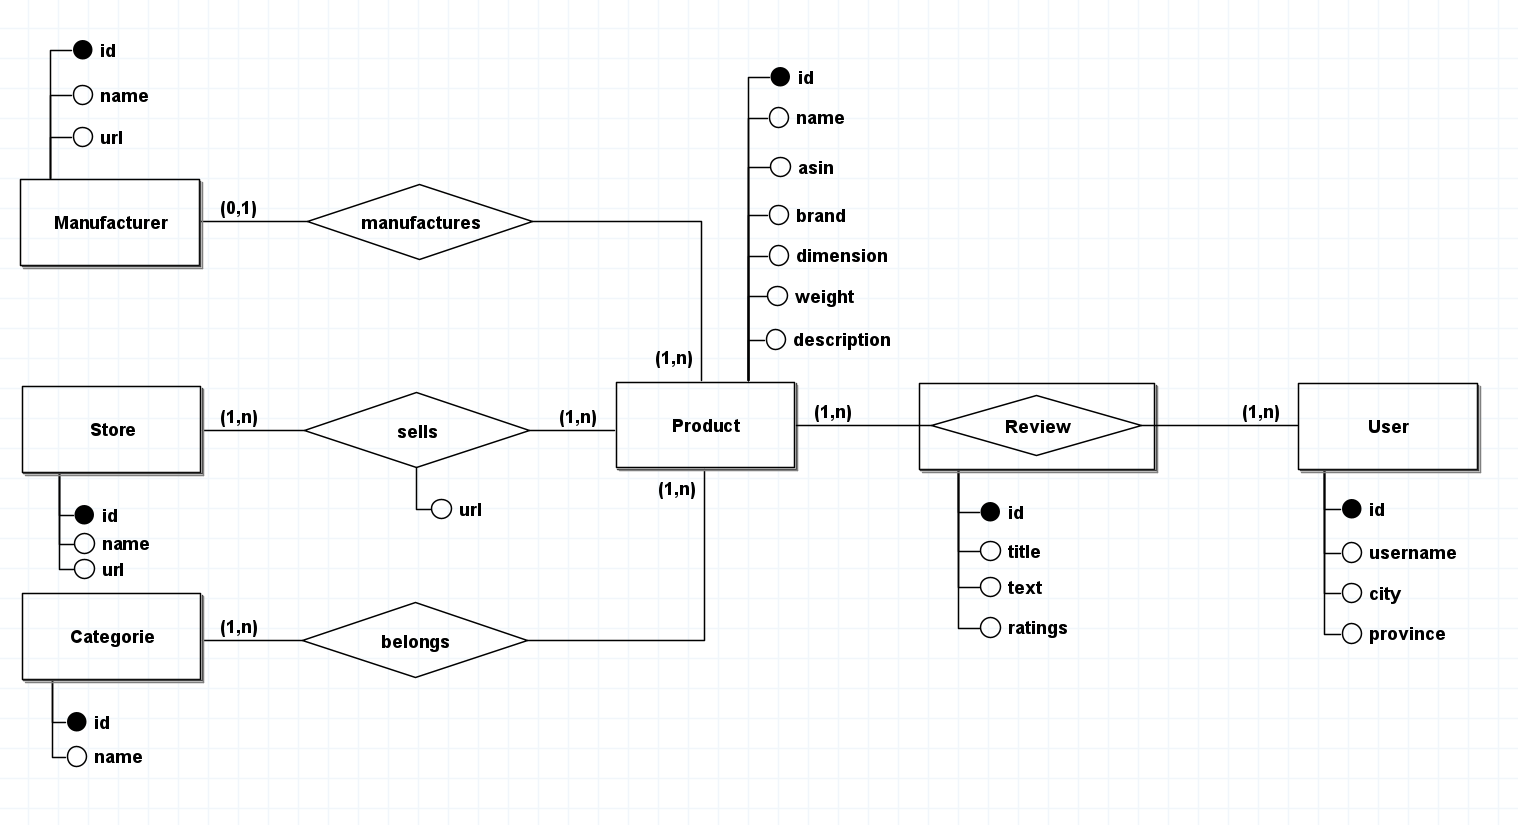


# EXPORTANDO AS TABELAS

In [28]:
user.to_csv("user.csv", index_label='id', index=True, sep=';')
manufacturer.to_csv("manufacturer.csv", index_label='id', index=True, sep=';')
product.to_csv("product.csv", index_label='id', index=True, sep=';')
categorie.to_csv("categorie.csv", index_label='id', index=True, sep=';')
store.to_csv("store.csv", index_label='id', index=True, sep=';')
review.to_csv("review.csv", index_label='id', index=True, sep=';')
product_categorie.to_csv("product_categorie.csv", index=False, sep=';')
product_store.to_csv("sells.csv", index=False, sep=';')